In [9]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Graph and verify if it's bipartite

In [2]:
# Load nodes and edges from CSV
nodes_df = pd.read_csv("y_bipartite_nodes.csv")
edges_df = pd.read_csv("y_bipartite_edges.csv")

# Reconstruct the bipartite graph
B = nx.Graph()

# Add nodes with attributes
for _, row in nodes_df.iterrows():
    B.add_node(row['node'], bipartite=row['bipartite'])

# Add edges with attributes
for _, row in edges_df.iterrows():
    B.add_edge(row['source'], row['target'], interaction=row['interaction'], date=row['date'])

# Verify if the graph is bipartite
is_bipartite = nx.is_bipartite(B)
print(f"Is the graph bipartite? {is_bipartite}")

Is the graph bipartite? True


## Basic Topology analysis

In [4]:
# Get the two node sets (users and posts)
users = {n for n, d in B.nodes(data=True) if d['bipartite'] == 'user'}
posts = set(B) - users

print(f"Number of users: {len(users)}")
print(f"Number of posts: {len(posts)}")

Number of users: 1023
Number of posts: 4621


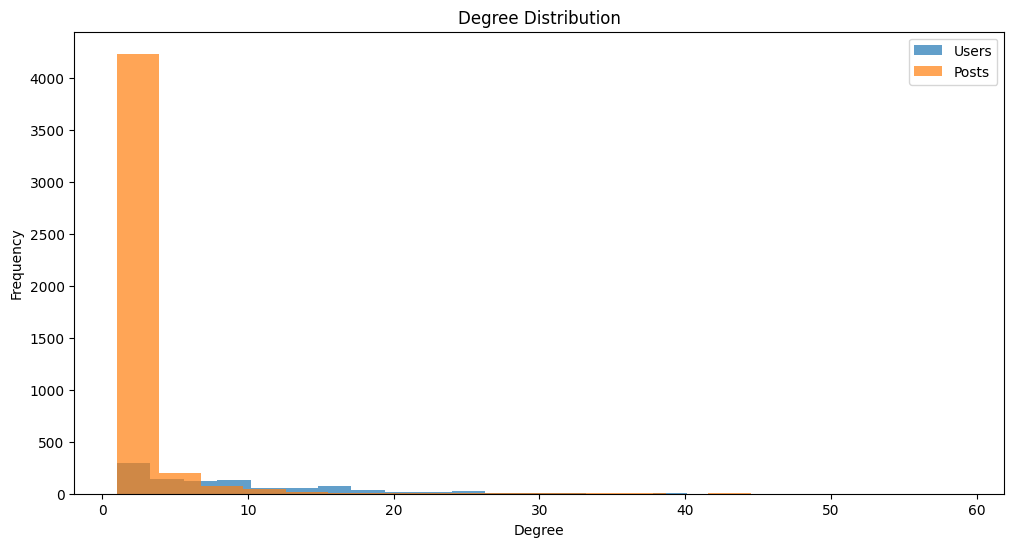

In [5]:
# Degree distribution
user_degrees = [B.degree(n) for n in users]
post_degrees = [B.degree(n) for n in posts]

plt.figure(figsize=(12, 6))
plt.hist(user_degrees, bins=20, alpha=0.7, label="Users")
plt.hist(post_degrees, bins=20, alpha=0.7, label="Posts")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [6]:

# Bipartite projection (e.g., user-user or post-post)
user_projection = nx.bipartite.projected_graph(B, users)
post_projection = nx.bipartite.projected_graph(B, posts)

print(f"User projection: {user_projection.number_of_nodes()} nodes, {user_projection.number_of_edges()} edges")
print(f"Post projection: {post_projection.number_of_nodes()} nodes, {post_projection.number_of_edges()} edges")

# Save projections
nx.write_edgelist(user_projection, "y_user_projection.edgelist")
nx.write_edgelist(post_projection, "y_post_projection.edgelist")

User projection: 1023 nodes, 31508 edges
Post projection: 4621 nodes, 66018 edges


Calculating centrality measures for the bipartite graph...
Bipartite centrality measures saved to 'bipartite_centrality_measures.csv'.


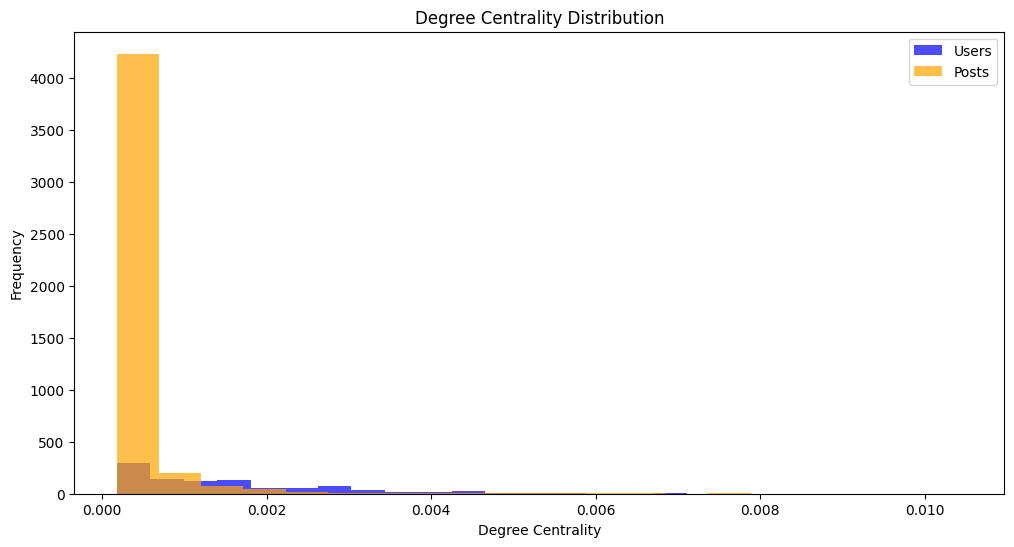

Calculating centrality measures for user and post projections...
User projection centrality measures saved to 'user_projection_centrality.csv'.
Post projection centrality measures saved to 'post_projection_centrality.csv'.


In [7]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Bipartite Centrality Measures
print("Calculating centrality measures for the bipartite graph...")

# Degree Centrality
degree_centrality = nx.degree_centrality(B)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(B)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(B)

# Create a DataFrame to store centrality measures
centrality_df = pd.DataFrame({
    'node': list(B.nodes),
    'degree_centrality': [degree_centrality[node] for node in B.nodes],
    'betweenness_centrality': [betweenness_centrality[node] for node in B.nodes],
    'closeness_centrality': [closeness_centrality[node] for node in B.nodes],
    'bipartite': [B.nodes[node]['bipartite'] for node in B.nodes],
})

# Save centrality measures to a CSV file
centrality_df.to_csv("bipartite_centrality_measures.csv", index=False)
print("Bipartite centrality measures saved to 'bipartite_centrality_measures.csv'.")

# Visualize Degree Centrality
plt.figure(figsize=(12, 6))
user_centrality = centrality_df[centrality_df['bipartite'] == 'user']['degree_centrality']
post_centrality = centrality_df[centrality_df['bipartite'] == 'post']['degree_centrality']

plt.hist(user_centrality, bins=20, alpha=0.7, label="Users", color="blue")
plt.hist(post_centrality, bins=20, alpha=0.7, label="Posts", color="orange")
plt.title("Degree Centrality Distribution")
plt.xlabel("Degree Centrality")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Centrality Measures for Projections
print("Calculating centrality measures for user and post projections...")

# User Projection
user_projection = nx.bipartite.projected_graph(B, users)
user_degree_centrality = nx.degree_centrality(user_projection)
user_betweenness_centrality = nx.betweenness_centrality(user_projection)
user_closeness_centrality = nx.closeness_centrality(user_projection)

# Post Projection
post_projection = nx.bipartite.projected_graph(B, posts)
post_degree_centrality = nx.degree_centrality(post_projection)
post_betweenness_centrality = nx.betweenness_centrality(post_projection)
post_closeness_centrality = nx.closeness_centrality(post_projection)

# Save projections' centrality measures
user_projection_df = pd.DataFrame({
    'node': list(user_projection.nodes),
    'degree_centrality': [user_degree_centrality[node] for node in user_projection.nodes],
    'betweenness_centrality': [user_betweenness_centrality[node] for node in user_projection.nodes],
    'closeness_centrality': [user_closeness_centrality[node] for node in user_projection.nodes],
})
user_projection_df.to_csv("user_projection_centrality.csv", index=False)

post_projection_df = pd.DataFrame({
    'node': list(post_projection.nodes),
    'degree_centrality': [post_degree_centrality[node] for node in post_projection.nodes],
    'betweenness_centrality': [post_betweenness_centrality[node] for node in post_projection.nodes],
    'closeness_centrality': [post_closeness_centrality[node] for node in post_projection.nodes],
})
post_projection_df.to_csv("post_projection_centrality.csv", index=False)

print("User projection centrality measures saved to 'user_projection_centrality.csv'.")
print("Post projection centrality measures saved to 'post_projection_centrality.csv'.")


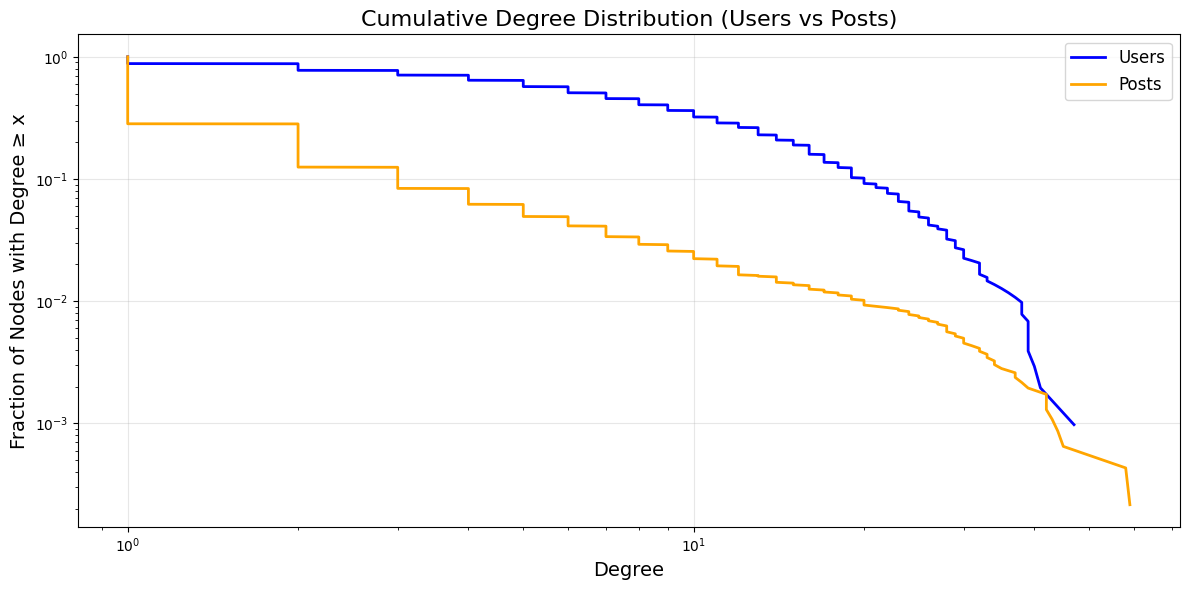

In [10]:
# Cumulative degree distribution
plt.figure(figsize=(12, 6))

# Users' cumulative degree distribution
user_degrees_sorted = np.sort(user_degrees)
user_cdf = 1.0 - np.arange(len(user_degrees_sorted)) / len(user_degrees_sorted)
plt.plot(user_degrees_sorted, user_cdf, label="Users", color="blue", lw=2)

# Posts' cumulative degree distribution
post_degrees_sorted = np.sort(post_degrees)
post_cdf = 1.0 - np.arange(len(post_degrees_sorted)) / len(post_degrees_sorted)
plt.plot(post_degrees_sorted, post_cdf, label="Posts", color="orange", lw=2)

# Labels and title
plt.title("Cumulative Degree Distribution (Users vs Posts)", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Fraction of Nodes with Degree ≥ x", fontsize=14)
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()



### Identifying Hubs

Top 10 Users by Degree:
user_136: 47
user_185: 41
user_179: 40
user_102: 39
user_248: 39
user_230: 39
user_31: 39
user_498: 38
user_211: 38
user_73: 38

Top 10 Posts by Degree:
post_234: 59
post_2230: 58
post_1133: 45
post_3982: 44
post_4884: 43
post_2148: 42
post_885: 42
post_1323: 42
post_6127: 39
post_5668: 38


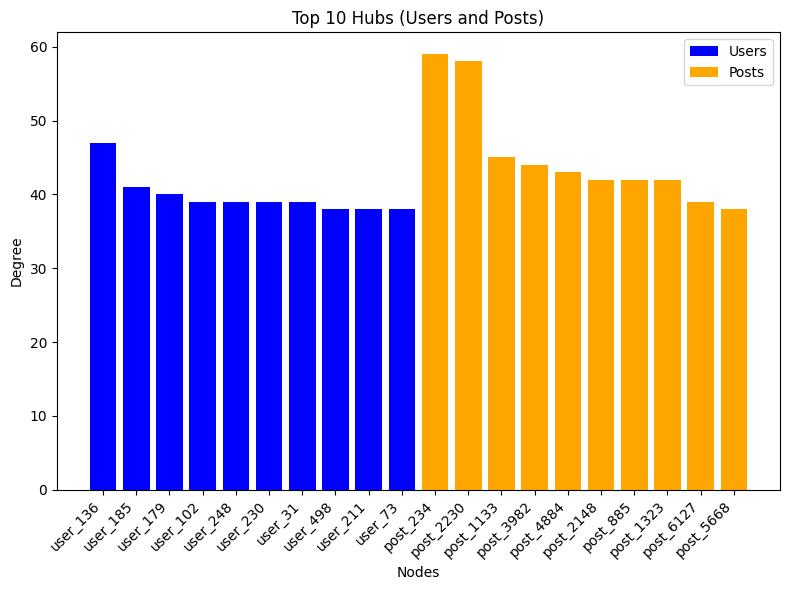

In [12]:
# Identify top 10 users and posts by degree
top_users = sorted([(n, B.degree(n)) for n in users], key=lambda x: x[1], reverse=True)[:10]
top_posts = sorted([(n, B.degree(n)) for n in posts], key=lambda x: x[1], reverse=True)[:10]

# Print the results
print("Top 10 Users by Degree:")
for user, degree in top_users:
    print(f"{user}: {degree}")

print("\nTop 10 Posts by Degree:")
for post, degree in top_posts:
    print(f"{post}: {degree}")

# Visualize hubs
plt.figure(figsize=(8, 6))
plt.bar([u[0] for u in top_users], [u[1] for u in top_users], color='blue', label='Users')
plt.bar([p[0] for p in top_posts], [p[1] for p in top_posts], color='orange', label='Posts')
plt.title('Top 10 Hubs (Users and Posts)')
plt.xlabel('Nodes')
plt.ylabel('Degree')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


### Other centrality measures

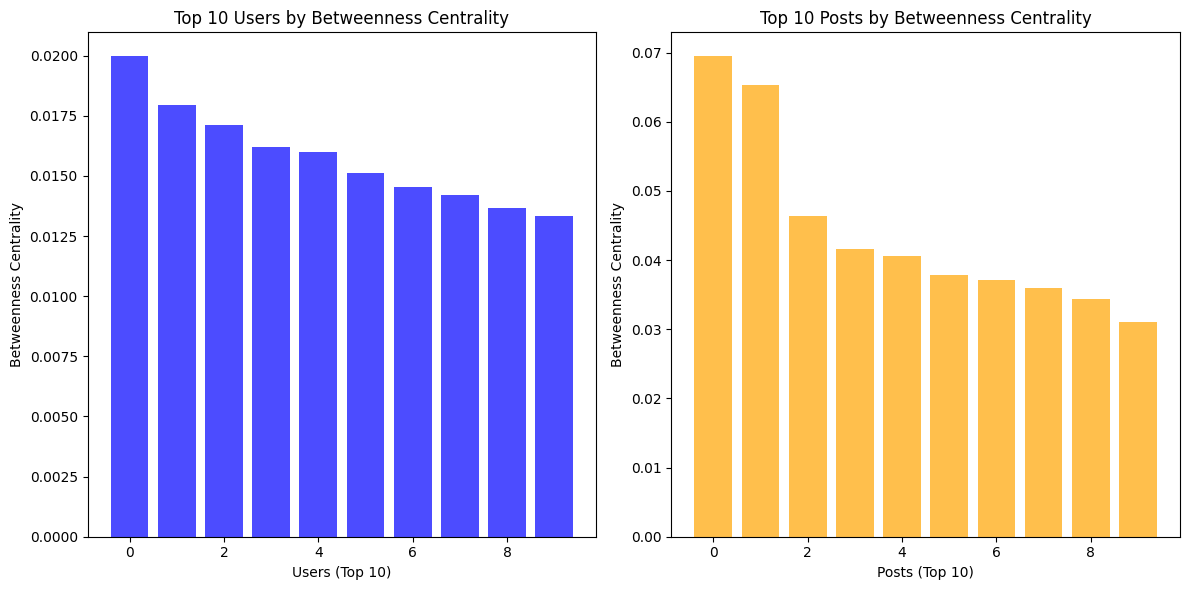

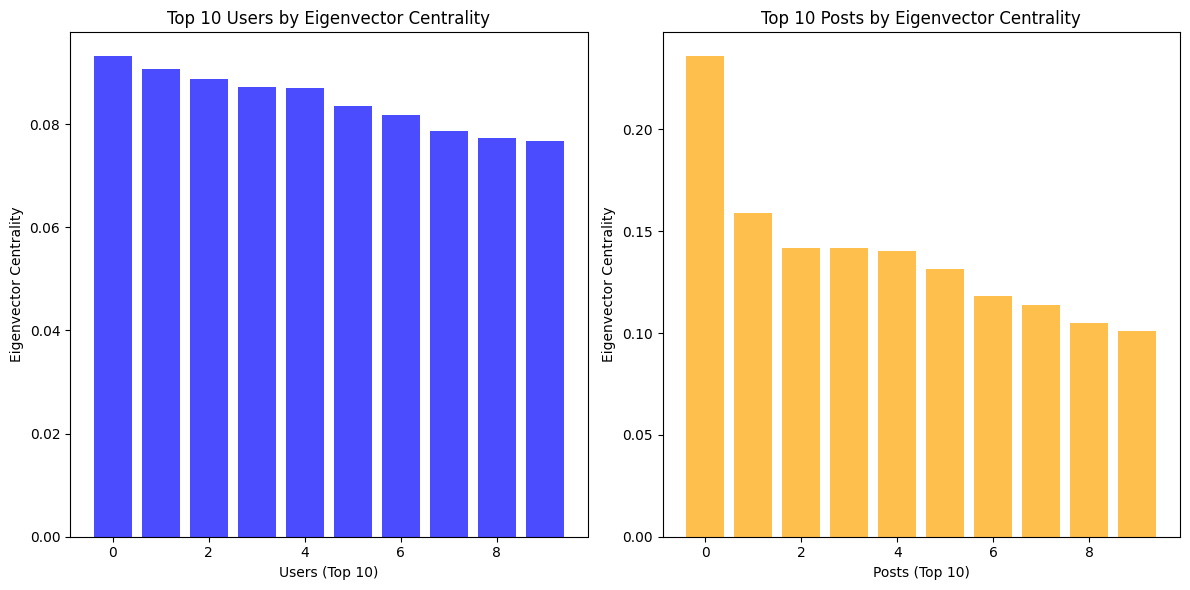

In [14]:
# Compute centrality measures
betweenness_centrality = nx.betweenness_centrality(B)
eigenvector_centrality = nx.eigenvector_centrality_numpy(B)

# Separate users and posts for visualization
user_betweenness = {n: betweenness_centrality[n] for n in users}
post_betweenness = {n: betweenness_centrality[n] for n in posts}

user_eigenvector = {n: eigenvector_centrality[n] for n in users}
post_eigenvector = {n: eigenvector_centrality[n] for n in posts}

# Visualize betweenness centrality
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(10), sorted(user_betweenness.values(), reverse=True)[:10], color='blue', alpha=0.7, label='Users')
plt.title('Top 10 Users by Betweenness Centrality')
plt.xlabel('Users (Top 10)')
plt.ylabel('Betweenness Centrality')

plt.subplot(1, 2, 2)
plt.bar(range(10), sorted(post_betweenness.values(), reverse=True)[:10], color='orange', alpha=0.7, label='Posts')
plt.title('Top 10 Posts by Betweenness Centrality')
plt.xlabel('Posts (Top 10)')
plt.ylabel('Betweenness Centrality')

plt.tight_layout()
plt.show()

# Visualize eigenvector centrality
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(10), sorted(user_eigenvector.values(), reverse=True)[:10], color='blue', alpha=0.7, label='Users')
plt.title('Top 10 Users by Eigenvector Centrality')
plt.xlabel('Users (Top 10)')
plt.ylabel('Eigenvector Centrality')

plt.subplot(1, 2, 2)
plt.bar(range(10), sorted(post_eigenvector.values(), reverse=True)[:10], color='orange', alpha=0.7, label='Posts')
plt.title('Top 10 Posts by Eigenvector Centrality')
plt.xlabel('Posts (Top 10)')
plt.ylabel('Eigenvector Centrality')

plt.tight_layout()
plt.show()



### Density

In [17]:
density = nx.density(B)
print(f"Density of the bipartite graph: {density:.4f}")

Density of the bipartite graph: 0.0006


### **Path Analysis** and **Connected Components**

In [18]:
# Check if the graph is connected
if nx.is_connected(B):
    # Average shortest path length
    avg_path_length = nx.average_shortest_path_length(B)
    print(f"Average Path Length: {avg_path_length:.4f}")
    
    # Diameter of the graph
    diameter = nx.diameter(B)
    print(f"Graph Diameter: {diameter}")
else:
    print("The graph is not connected. Computing metrics on the giant component.")
    # Extract the largest connected component
    giant_component = max(nx.connected_components(B), key=len)
    subgraph = B.subgraph(giant_component)
    
    # Average path length in the giant component
    avg_path_length = nx.average_shortest_path_length(subgraph)
    print(f"Average Path Length (Giant Component): {avg_path_length:.4f}")
    
    # Diameter in the giant component
    diameter = nx.diameter(subgraph)
    print(f"Diameter (Giant Component): {diameter}")


The graph is not connected. Computing metrics on the giant component.
Average Path Length (Giant Component): 5.3291
Diameter (Giant Component): 16


In [19]:
# Calculate connected components
components = list(nx.connected_components(B))
num_components = len(components)
print(f"Number of Connected Components: {num_components}")

# Size of the giant component
giant_component = max(components, key=len)
giant_size = len(giant_component)
print(f"Size of the Giant Component: {giant_size}")

Number of Connected Components: 37
Size of the Giant Component: 5560


### **Clustering Coefficient**

In [20]:
# Bipartite clustering coefficient
clustering_coeff = nx.algorithms.bipartite.clustering(B)
avg_clustering_coeff = sum(clustering_coeff.values()) / len(clustering_coeff)

print(f"Average Clustering Coefficient: {avg_clustering_coeff:.4f}")

# Display a few example nodes
print("Sample Clustering Coefficients (Top 5):")
for node, coeff in list(clustering_coeff.items())[:5]:
    print(f"Node {node}: {coeff:.4f}")


Average Clustering Coefficient: 0.3669
Sample Clustering Coefficients (Top 5):
Node user_145: 0.0573
Node post_1: 0.1505
Node user_26: 0.0352
Node post_5: 0.4968
Node user_11: 0.0511


### **Assortativity**

In [21]:
# Degree assortativity coefficient
assortativity = nx.degree_assortativity_coefficient(B)
print(f"Degree Assortativity Coefficient: {assortativity:.4f}")

Degree Assortativity Coefficient: -0.1437
